# libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data set

In [ ]:
df=pd.read_csv("50_Startups.csv")
df

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
df.rename(columns={'Marketing Spend':'MP','R&D Spend':'RD'})

In [ ]:
df

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["State"] = le.fit_transform(df["State"])

In [ ]:
df["State"]

In [ ]:
df.corr()

In [ ]:
df.rename(columns={'R&D Spend':'RD','Marketing Spend':'MS'},inplace=True)

In [ ]:
df

# Assumptions Check

#### Model Creation

In [ ]:
import statsmodels.formula.api as smf
model1=smf.ols('Profit~RD+Administration+MS+State',data=df).fit()


In [40]:
model1.params


NameError: name 'model1' is not defined

In [ ]:
model1.summary()

In [ ]:
print(model1.pvalues)

In [ ]:
print(model1.tvalues)

In [ ]:
model1.rsquared

In [ ]:
model1.rsquared_adj

# veryfying for each column

In [ ]:
lev1=smf.ols('Profit~RD',data = df).fit()  
print(lev1.tvalues, '\n', lev1.pvalues) 


In [ ]:
RD1=print(lev1.rsquared)



In [ ]:
ARD1=lev1.rsquared_adj

In [ ]:
lev2=smf.ols('Profit~Administration',data = df).fit()  
print(lev2.tvalues, '\n', lev2.pvalues) 


In [ ]:
RD2=lev2.rsquared
ARD2=lev2.rsquared_adj

In [ ]:
lev3=smf.ols('Profit~MS',data = df).fit()  
print(lev3.tvalues, '\n', lev3.pvalues)

In [ ]:
RD3=lev3.rsquared
ARD3=lev3.rsquared_adj

In [ ]:
lev4=smf.ols('Profit~State',data = df).fit()  
print(lev4.tvalues, '\n', lev4.pvalues)

In [ ]:
RD4=lev4.rsquared
ARD4=lev4.rsquared_adj

# VIF checking

In [ ]:
rsq_1=smf.ols('RD~Administration+MS+State',data=df).fit().rsquared  
vif_1 = 1/(1-rsq_1) 

rsq_2 = smf.ols('Administration~RD+MS+State',data=df).fit().rsquared  
vif_2 = 1/(1-rsq_2) 

rsq_3 = smf.ols('MS~Administration+RD+State',data=df).fit().rsquared  
vif_3 = 1/(1-rsq_3) 

rsq_4 = smf.ols('State~RD+Administration+MS',data=df).fit().rsquared  
vif_4 = 1/(1-rsq_4) 



In [ ]:
d1={'variables':['RD','Administration','MS','State'],'VIF':[vif_1,vif_2,vif_3,vif_4]}


In [ ]:
df1=pd.DataFrame(d1)
df1

In [ ]:
df.corr()

In [ ]:
d2={'variables':['RD','Administration','MS','State'],'Rsquared':[RD1,RD2,RD3,RD4]}

In [ ]:
df2=pd.DataFrame(d2)
df2

# Residual Analysis

In [41]:
X=df.drop("Profit",axis=1)
X


,RD,Administration,MS,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [42]:
df["Profit"]-model1.predict(X)

0      -240.934416
1      2609.393955
2      8899.431581
3      9224.499382
4     -5954.860630
5     -6570.087958
6     -2016.402125
7     -4271.004155
8       490.611791
9     -5149.346740
10    10611.576482
11     8661.886997
12    12446.641369
13     6796.378735
14   -16947.693104
15   -16297.587589
16    10055.036102
17    -4800.428034
18    -4748.168968
19     7163.632009
20     1811.887956
21    -5983.963770
22    -4354.693173
23    -1262.466061
24    -4788.999732
25     5144.849591
26    -4866.912270
27    -9377.248176
28     1623.265402
29     -767.388601
30      485.636602
31     -181.152734
32    -1595.336763
33    -1135.453688
34     7652.782939
35     5991.106571
36    15424.078702
37      307.906968
38    11555.779367
39    -2744.396769
40     3403.599361
41     2997.938430
42      857.718955
43     9616.848808
44      569.213149
45    17300.941187
46    -6672.246236
47    -3949.833956
48   -13473.163247
49   -33552.873495
dtype: float64

In [43]:
model1.resid.min()

-33552.873495085936

# Test of normality for residuals

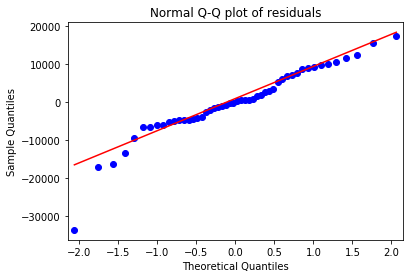

In [44]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Resudial plot for Homoscedasticity

In [45]:
model1.fittedvalues

0     192502.764416
1     189182.666045
2     182150.958419
3     173677.490618
4     172142.800630
5     163561.207958
6     158138.912125
7     160023.604155
8     151721.158209
9     154909.306740
10    135510.373518
11    135597.513003
12    129138.878631
13    127510.971265
14    149550.343104
15    146214.627589
16    116937.893898
17    130170.798034
18    129015.068968
19    115613.227991
20    116662.142044
21    117296.983770
22    114706.943173
23    109996.456061
24    113341.039732
25    102259.490409
26    110600.452270
27    114385.558176
28    101659.114598
29    101772.028601
30     99451.953398
31     97664.712734
32     99023.176763
33     97914.373688
34     89060.017061
35     90488.403429
36     75284.111298
37     89641.233032
38     69673.280633
39     83750.156769
40     74836.310639
41     74800.891570
42     70640.771045
43     60142.131192
44     64631.116851
45     47625.138813
46     56162.996236
47     46509.563956
48     49146.573247
49     48234.273495


# Cook's distance
### Detecting the influncers

In [47]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

In [48]:
c

array([2.64962564e-05, 3.65460668e-03, 2.55553863e-02, 2.31878065e-02,
       1.14302043e-02, 1.23884179e-02, 3.11121982e-03, 2.80901852e-03,
       5.28558551e-05, 6.83388587e-03, 1.18531743e-02, 2.08698178e-02,
       9.05518079e-03, 7.11076506e-03, 4.81255370e-02, 4.55550364e-02,
       1.47917331e-02, 4.44019365e-03, 1.69993736e-03, 3.99363634e-02,
       6.08628041e-04, 1.22997651e-02, 2.28337576e-03, 2.15977000e-04,
       6.00485777e-03, 4.43262172e-03, 2.67612080e-03, 3.28473798e-02,
       1.03151489e-03, 1.51104626e-04, 3.28164666e-05, 9.07970048e-06,
       8.17741552e-04, 1.00239191e-04, 2.18081482e-02, 8.84928027e-03,
       4.36551851e-02, 5.68744297e-05, 6.25167081e-02, 1.85525357e-03,
       2.27307299e-03, 1.55244650e-03, 1.56379369e-04, 2.73167923e-02,
       1.17346160e-04, 1.12202649e-01, 4.28134712e-02, 5.41565252e-03,
       1.91163485e-01, 3.06028195e-01])

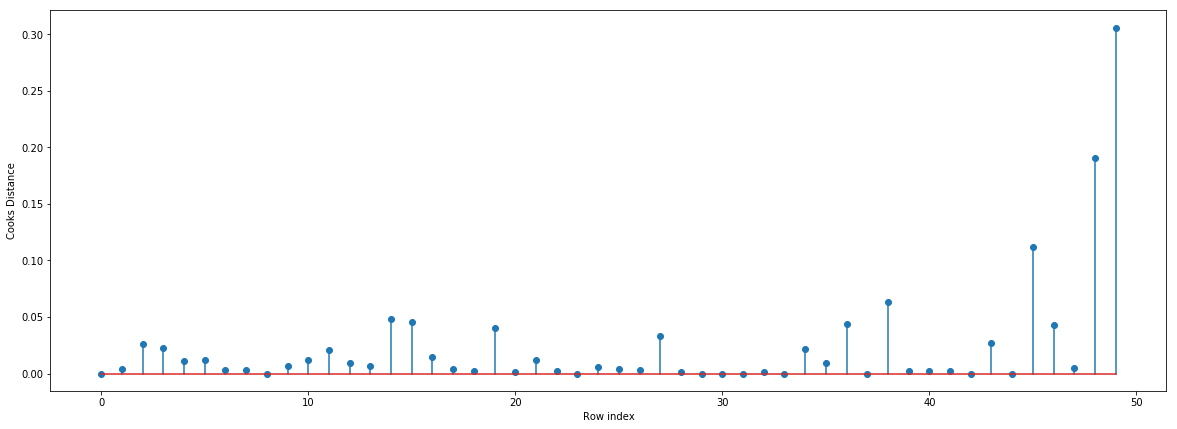

In [50]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [51]:
(np.argmax(c),np.max(c))

(49, 0.3060281954699332)

# High influence Points

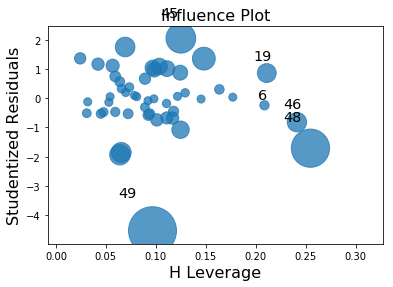

In [53]:
# from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [55]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

###  No  influencer

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [61]:
df.head()

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Predicting for  new data

In [65]:
df2=pd.DataFrame({'RD':163256,'Administration':186525.10,'MS':478232.36,'State':2},index=[1])
df2

,RD,Administration,MS,State
1,163256,186525.1,478232.36,2


In [66]:
model1.predict(df2)

1    189660.424757
dtype: float64

In [67]:
model1.rsquared

0.9507462044842656

In [68]:
model1.aic

1060.7712849964787

In [69]:
model1.rsquared_adj

0.9463680893273114

# ==============================================================

# Toyota

In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
#Read Dataset 
T_data=pd.read_csv('toyota.csv',encoding='latin-1')

In [24]:
T_data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


In [25]:
T_data.shape

(1436, 38)

In [26]:
T_data.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [27]:
T_data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [28]:
DF=T_data[{"Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"}]
DF

,Age_08_04,Gears,HP,cc,Price,Quarterly_Tax,Weight,KM,Doors
0,23,5,90,2000,13500,210,1165,46986,3
1,23,5,90,2000,13750,210,1165,72937,3
2,24,5,90,2000,13950,210,1165,41711,3
3,26,5,90,2000,14950,210,1165,48000,3
4,30,5,90,2000,13750,210,1170,38500,3
5,32,5,90,2000,12950,210,1170,61000,3
6,27,5,90,2000,16900,210,1245,94612,3
7,30,5,90,2000,18600,210,1245,75889,3
8,27,5,192,1800,21500,100,1185,19700,3
9,23,5,69,1900,12950,185,1105,71138,3


## Model creation

In [29]:

DF.rename(columns={'Age_08_04':'age','Quarterly_Tax':'qt'},inplace=True)

In [30]:
DF.columns

Index(['age', 'Gears', 'HP', 'cc', 'Price', 'qt', 'Weight', 'KM', 'Doors'], dtype='object')

In [35]:
import statsmodels.formula.api as smf
model2=smf.ols('Price~age+Gears+HP+cc+qt+Weight+KM+Doors',data=DF).fit()

In [36]:
model2.rsquared

0.8637627463428192

In [37]:
model2.rsquared_adj

0.8629989775766963

In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:58:26   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
qt             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""